<a href="https://colab.research.google.com/github/Siddhant254/MNIST-Project-using-Deep-Neural-Network/blob/main/Deep_Neural_Network_on_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
print(tf.test.gpu_device_name())

/device:GPU:0


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# DATA
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
# training data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# testing data
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# shape of train data
train.shape

(42000, 785)

In [ ]:
# shape of test data
test.shape

(28000, 784)

In [ ]:
# Converting dataframe to numpy matrix
train_image = train.to_numpy()

In [ ]:
train_image.shape

(42000, 785)

In [ ]:
train_image

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

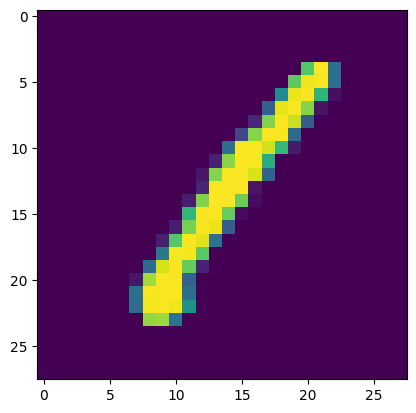

In [ ]:
# Example of image
image = train_image[0][1:].reshape(28,28)
plt.imshow(image)

In [ ]:
# training input
X_train = train.iloc[:,1:].values

# training output
y_train = train.iloc[:,0].values

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)   # One Hot Encoding of the labels

y_train.shape

(42000, 10)

In [ ]:
y_train[20] # 8 according to the encoding

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

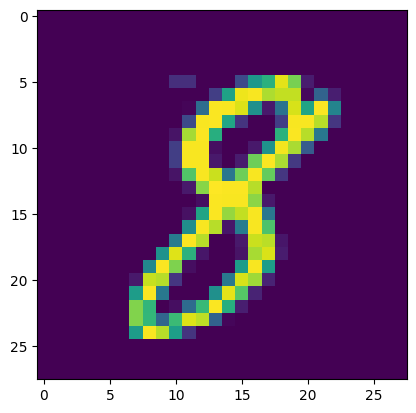

In [ ]:
plt.imshow(X_train[20].reshape(28,28)) # Should have value 8

In [ ]:
# Normalizing image
X_train = X_train/255.0

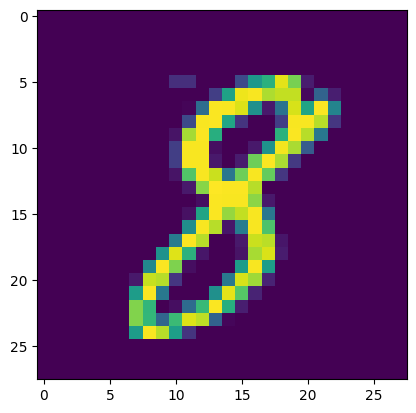

In [ ]:
plt.imshow(X_train[20].reshape(28,28)) # Should have value 8

In [ ]:
# Train validation split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3)

In [ ]:
X_train.shape

(29400, 784)

In [ ]:
X_val.shape

(12600, 784)

In [ ]:
from tensorflow.keras import Sequential

In [36]:
model = Sequential([
    keras.Input(shape=(784)),
    layers.Dense(64,activation='sigmoid'),
    layers.Dense(64,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(10,activation='softmax')
])


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [40]:
history = model.fit(X_train,y_train,batch_size=64,epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
460/460 [==============================] - 9s 6ms/step - loss: 1.4219 - accuracy: 0.6185 - val_loss: 0.7436 - val_accuracy: 0.8080
Epoch 2/20
460/460 [==============================] - 2s 5ms/step - loss: 0.5391 - accuracy: 0.8690 - val_loss: 0.3998 - val_accuracy: 0.9016
Epoch 3/20
460/460 [==============================] - 2s 4ms/step - loss: 0.3172 - accuracy: 0.9195 - val_loss: 0.2806 - val_accuracy: 0.9255
Epoch 4/20
460/460 [==============================] - 3s 6ms/step - loss: 0.2316 - accuracy: 0.9376 - val_loss: 0.2332 - val_accuracy: 0.9356
Epoch 5/20
460/460 [==============================] - 2s 5ms/step - loss: 0.1860 - accuracy: 0.9500 - val_loss: 0.2007 - val_accuracy: 0.9418
Epoch 6/20
460/460 [==============================] - 2s 5ms/step - loss: 0.1541 - accuracy: 0.9584 - val_loss: 0.1842 - val_accuracy: 0.9448
Epoch 7/20
460/460 [==============================] - 2s 5ms/step - loss: 0.1325 - accuracy: 0.9638 - val_loss: 0.1662 - val_accuracy: 0.9506
Epoch 

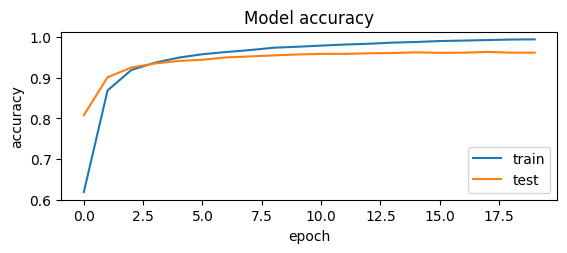

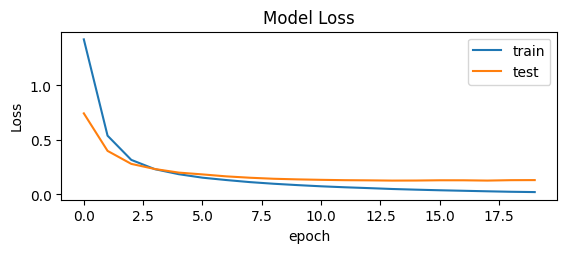

In [43]:
# Plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

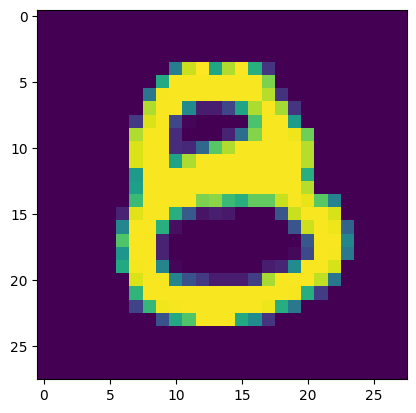

In [45]:
# Evaluation by example
plt.imshow(X_val[2].reshape(28,28))

In [51]:
predict_x = model.predict(X_val[2].reshape(1,784))

1/1 [==============================] - 0s 25ms/step


In [52]:
predict_x

array([[1.0398189e-04, 5.1538034e-05, 6.3707106e-05, 1.9361207e-02,
        3.1241126e-07, 1.0430791e-03, 2.6138673e-06, 1.7571954e-04,
        9.7450268e-01, 4.6951459e-03]], dtype=float32)

In [53]:
max(predict_x[0])

0.9745027

In [54]:
np.argmax(predict_x,axis=1)

array([8])